<h1><center>Evidence For Dark Matter</center></h1>

<h2>1.1) Galaxy Rotation Curves</h2>

1. Derive from first principles (Newtonian gravity) and plot the expected orbital velocity
profiles (orbital velocity versus radius) for stars in a galaxy, assuming a circular orbit,
and the following density profiles:

 <ul>
  <li>Constant density <br/>
      &emsp;&emsp;$\rho(r<R_0)=\rho_0$</li>
  <li>Density which decreases as <br/>
      &emsp;&emsp;$\rho(r)=\frac{\rho_0}{(1+(r/R_0)^2)}$ </li>
  <li>Density which decreases as <br/>
      &emsp;&emsp;$\rho(r)=\frac{\rho_0}{(r/R_s)(1+(r/R_s))^2}$</li>
</ul> 

<i>(Answer)</i>

Constant density $\rho(r<R_0)=\rho_0$:

\begin{equation}
    \frac{GM}{r^2} = \frac{v^2}{r}
\end{equation}

\begin{equation}
    M(r) = 4\pi\int^r_0 \rho(r')r'^2dr = \begin{cases}
        \frac{4\pi\rho_0r^3}{3},     & \text{if } r \leq R_0\\
        \frac{4\pi\rho_0R_0^3}{3},               & \text{if }  r_i > R_0
    \end{cases}
\end{equation}


\begin{equation}
    v(r)^2 = \begin{cases}
        \frac{4\pi G\rho_0r^2}{3},     & \text{if } r \leq R_0\\
        \frac{4\pi G\rho_0R_0^3}{3r},               & \text{if }  r_i > R_0
    \end{cases}
\end{equation}

Density which decreases as $\rho(r)=\rho_0/(1+(r/R_0)^2)$:

\begin{equation}
    M(r) = 4\pi\rho_0\int^r_0 \frac{r'^2}{1+\Big(\frac{r'}{R_0}\Big)^2}dr = 4\pi\rho_0R_0^3\int^{r/R_0}_0 \frac{u^2}{1+u^2}du = 4\pi\rho_0R_0^3\Big[\frac{r}{R_0} - \tan^{-1}\frac{r}{R_0}\Big]
\end{equation}

\begin{equation}
    v(r)^2 = \frac{4\pi G\rho_0R_0^3}{r}\Big[\frac{r}{R_0} - \tan^{-1}\frac{r}{R_0}\Big]
\end{equation}

Density which decreases as $\rho(r)=\frac{\rho_0}{(r/R_s)(1+(r/R_s)^2)}$:

\begin{equation}
    M(r) = 4\pi\rho_0\int^r_0 \frac{r'^2}{\frac{r'}{R_s}\Big(1+\frac{r'}{R_s}\Big)^2}dr = 4\pi\rho_0R_s^3\int^{r/R_s}_0 \frac{u}{(1+u)^2}du 
    = 4\pi\rho_0R_s^3\Big[\frac{1}{1+\frac{r}{R_s}} +\ln\Big(\frac{r}{R_s}+1\Big) - 1  \Big]
\end{equation}

\begin{equation}
    v(r)^2 = \frac{4\pi\rho_0GR_s^3}{r}\Big[\frac{1}{1+\frac{r}{R_s}} +\ln\Big(\frac{r}{R_s}+1\Big) - 1  \Big]
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define plotting fonts
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('font', size=16)

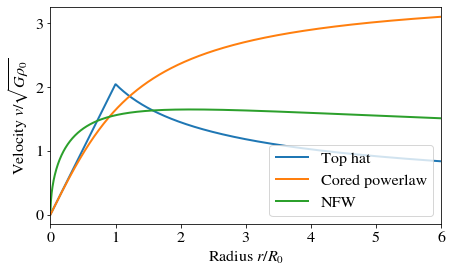

In [2]:
r = np.linspace(1e-3, 6,1000)
v1 = np.zeros(len(r))
v1[r<=1] = np.sqrt(4*np.pi*r[r<=1]**2/3)
v1[r>1] = np.sqrt(4*np.pi/(3*r[r>1]))
v2 = np.sqrt(4*np.pi/r*(r-np.arctan(r)))
v3 = np.sqrt(4*np.pi/r*(1/(r+1)+np.log(r+1)-1))

plt.figure(figsize = (7,4))
plt.plot(r, v1,label = "Top hat",lw = 2)
plt.plot(r, v2,label = "Cored powerlaw",lw = 2)
plt.plot(r, v3,label = "NFW",lw = 2)
plt.xlabel("Radius $r/R_0$")
plt.ylabel("Velocity $v/\sqrt{G \\rho_0}$")
plt.legend(loc = 4)

plt.xlim([0,6])
plt.show()

3. The famous Messer 33 data is given below. 

a. Plot the rotational velocity as a function of radius

b. Use the scipy curve fitting tool to fit the velocity curves calculated for the cored power law and the NFW profiles. Which do you think looks like the best fit? 

c. Once the parameters $\rho_0$ and $r_0$ are known for each model, plot both expected density profiles on a new graph. Make sure that this graph is plotted on a log-log scale so that the power-law behaviour can be seen. 

<i>data source: https://iopscience.iop.org/article/10.3847/1538-3881/aa79f3</i><br/>
<i>curve fitting tool: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html</i>

<ipython-input-3-c5c18b238fa2>:23: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(A*B)
<ipython-input-3-c5c18b238fa2>:37: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(A*B)


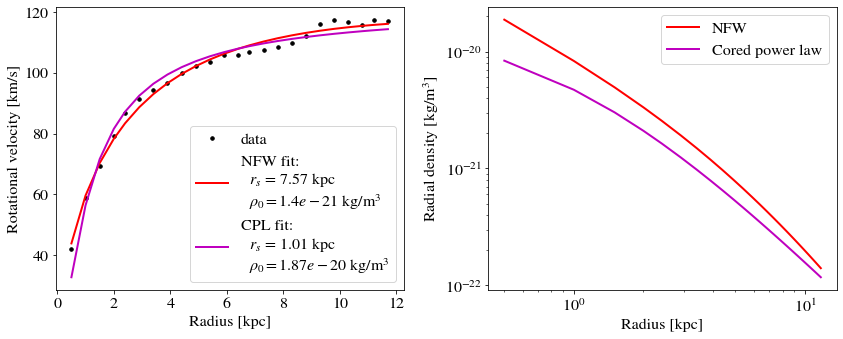

In [3]:
from scipy.optimize import curve_fit

# Radius (kpc)
radius = np.array([0.5, 1.0, 1.5, 2.0, 2.4, 2.9, 3.4, 3.9, 4.4, 4.9, 5.4, 5.9,
         6.4, 6.8, 7.3, 7.8, 8.3, 8.8, 9.3, 9.8, 10.3, 10.8, 11.2, 11.7])

# Rotational Velocity (km/s)
velocity = np.array([42.0, 58.8, 69.4, 79.3, 86.7, 91.4, 94.2, 96.5, 99.8, 102.1, 103.6,
           105.9, 105.7, 106.8, 107.3, 108.3, 109.7, 112.0, 116.1, 117.2, 116.5, 115.7, 117.4, 116.8])

def vel_NFW(r, rs, rho_0):
    '''
    inputs: r - radius (m)
            rs - scale radius (m)
            rho_0 - scale density (kg/m^3)
    returns: velocity curve (m/s)
    '''
    
    G = 6.674e-11 # m^3 kg^-1 s^-2
    A = 4*np.pi*rho_0*G*rs**3/r
    B = 1/(1+r/rs) + np.log(r/rs+1) - 1
    
    return np.sqrt(A*B)

def vel_cpl(r, rs, rho_0):
    '''
    inputs: r - radius (m)
            rs - scale radius (m)
            rho_0 - scale density (kg/m^3)
    returns: velocity curve (m/s)
    '''
    
    G = 6.674e-11 # m^3 kg^-1 s^-2
    A = 4*np.pi*rho_0*G*rs**3/r
    B = r/rs - np.arctan(r/rs)
    
    return np.sqrt(A*B)

kpc2m = 3.068e19 #m/kpc (Conversion from kpc to m)
# Curve fit NFW velocity curve
param_nfw, pcov_nfw = curve_fit(vel_NFW, radius*kpc2m, velocity*1e3, p0 = (2*kpc2m, 1e-5))

# Curve fit cored power law profile
param_cpl, pcov_cpl = curve_fit(vel_cpl, radius*kpc2m, velocity*1e3, p0 = (2*kpc2m, 1e-5))

# Plot velocity curves
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(121)
ax1.plot(radius, velocity, 'k.', label = 'data', ms = 7)
ax1.plot(radius, vel_NFW(radius*kpc2m, param_nfw[0], param_nfw[1])*1e-3, 'r-',  lw =2,
         label = 'NFW fit:\n  $r_s$ = {:.3} kpc\n  $\\rho_0 = {:.3}$ kg/m$^3$'.format(param_nfw[0]/kpc2m, param_nfw[1]))

ax1.plot(radius, vel_cpl(radius*kpc2m, param_cpl[0], param_cpl[1])*1e-3, 'm-',   lw =2,
         label = 'CPL fit:\n  $r_s$ = {:.3} kpc\n  $\\rho_0 = {:.3}$ kg/m$^3$'.format(param_cpl[0]/kpc2m, param_cpl[1]))
ax1.set_ylabel("Rotational velocity [km/s]");
ax1.set_xlabel("Radius [kpc]");
plt.legend();

# Plot density profiles
ax2 = fig.add_subplot(122)
rs = param_nfw[0]/kpc2m
ax2.loglog(radius, param_nfw[1]/(radius/rs*(1+radius/rs)**2), 'r',  lw =2, label = "NFW")

r0 = param_cpl[0]/kpc2m
ax2.loglog(radius, param_cpl[1]/((1+radius/r0)**2),'m',  lw =2, label = "Cored power law")
plt.legend();
ax2.set_ylabel("Radial density [kg/m$^3$]");
ax2.set_xlabel("Radius [kpc]");
plt.tight_layout()

\begin{equation}
    \int_0^{R/R_s}\left(\frac{1}{x}-\frac{x}{1+x^2}\right)dx = [\ln(x)-\ln(1+x^2)]_0^{R/R_s}
\end{equation}

\begin{equation}
    v^2 (R)= \frac{4\pi G}{R}\int_0^R\rho(r)dr
\end{equation}